In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [2]:
# 2. Đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DXG Historical Data.csv')

In [3]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(len(df1)) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 4s 75ms/step - loss: 0.0269 - val_loss: 0.0024
Epoch 2/100
21/21 [==============================] - 1s 55ms/step - loss: 0.0041 - val_loss: 1.1099e-04
Epoch 3/100
21/21 [==============================] - 1s 58ms/step - loss: 0.0010 - val_loss: 2.7626e-04
Epoch 4/100
21/21 [==============================] - 1s 67ms/step - loss: 6.3678e-04 - val_loss: 8.3705e-05
Epoch 5/100
21/21 [==============================] - 2s 88ms/step - loss: 5.8271e-04 - val_loss: 7.6392e-05
Epoch 6/100
21/21 [==============================] - 2s 86ms/step - loss: 5.5599e-04 - val_loss: 7.5164e-05
Epoch 7/100
21/21 [==============================] - 2s 73ms/step - loss: 5.3697e-04 - val_loss: 7.6954e-05
Epoch 8/100
21/21 [==============================] - 1s 51ms/step - loss: 5.2390e-04 - val_loss: 7.7865e-05
Epoch 9/100
21/21 [==============================] - 1s 51ms/step - loss: 5.0129e-04 - val_loss: 8.5434e-05
Epoch 10/100
21/21 [========================

In [11]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [13]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 18582.81632436609


In [14]:
x_input = test_data[len(test_data)-time_step:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


[[0.32441309094429016], [0.32280808687210083], [0.32085517048835754], [0.3186880052089691], [0.3163754940032959], [0.3139534890651703], [0.3114403486251831], [0.3088480234146118], [0.30618539452552795], [0.303460031747818], [0.30067840218544006], [0.2978464961051941], [0.294969767332077], [0.29205334186553955], [0.2891019582748413], [0.2861199975013733], [0.283111572265625], [0.2800804674625397], [0.27703019976615906], [0.273963987827301], [0.2708848714828491], [0.26779547333717346], [0.26469841599464417], [0.2615959346294403], [0.2584901452064514], [0.2553829550743103], [0.25227609276771545], [0.24917103350162506], [0.24606925249099731], [0.24297189712524414], [0.23988017439842224], [0.23679499328136444], [0.23371726274490356], [0.2306477576494217], [0.22758705914020538], [0.22453579306602478], [0.2214944213628769], [0.21846333146095276], [0.21544289588928223], [0.21243338286876678], [0.20943503081798553], [0.20644795894622803], [0.20347225666046143], [0.20050805807113647], [0.1975553

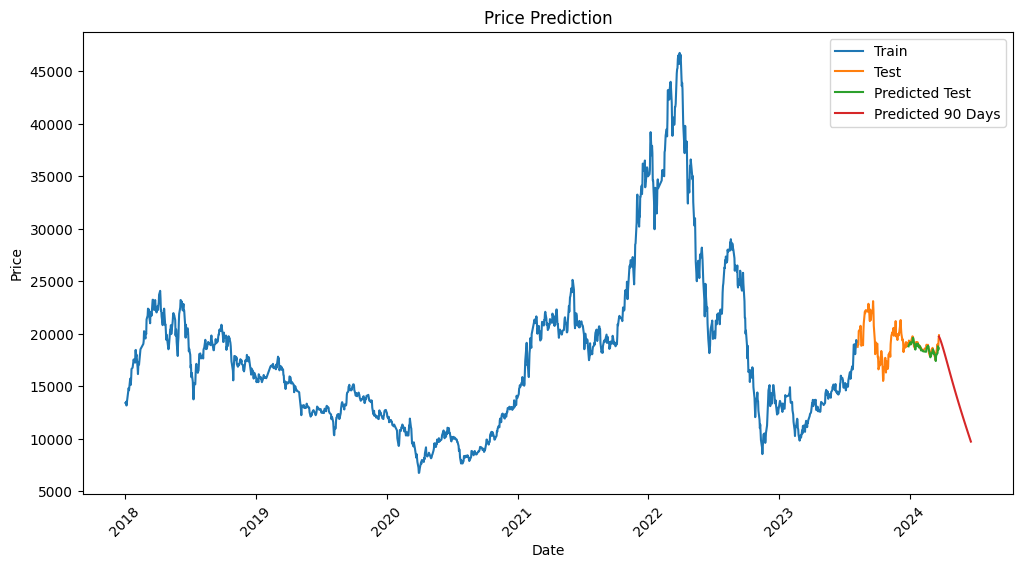

In [15]:
plt.figure(figsize=(12,6))

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot train data
train_dates = df['Date'][:train_size]
plt.plot(train_dates, scaler.inverse_transform(train_data), label='Train')

# Plot test data
test_dates = df['Date'][train_size:train_size + test_size]
plt.plot(test_dates, scaler.inverse_transform(test_data), label='Test')

# Plot predictions for test data
test_predict_dates = df['Date'][train_size + time_step:train_size + time_step + len(y_pred)]
plt.plot(test_predict_dates, y_pred, label='Predicted Test')

# Predict next 30 days
last_date = df['Date'].iloc[-1]
predict_30_days_dates = pd.date_range(start=last_date, periods=90)
plt.plot(predict_30_days_dates, scaler.inverse_transform(lst_output), label='Predicted 90 Days')

# Formatting the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Prediction')
plt.xticks(rotation=45)
plt.show()
